In [37]:
import numpy as np
from numpy.linalg import eig
import matplotlib.pyplot as plt

In [38]:
data = np.load('mnist.npz')

In [39]:
class PCA:
    def __init__(self, p):      # p << d; p = new dimension count
        self.p = p
        self.components     = None
        self.mean           = None
        self.variance_share = None
    
    def fit(self, X):
        # Regularization
        self.mean = np.mean(X, axis = 0)
        X -= self.mean
        cov_matrix = np.cov(X.T)

        values, vectors = np.linalg.eig(cov_matrix)
        sort_idx = np.argsort(values)[::-1]
        values   = values[sort_idx]
        vectors  = vectors[:, sort_idx]

        self.components = vectors[:self.p]
        self.variance_share = np.sum(values[:self.p]) / np.sum(values)
    
    def transform(self, X):
        X -= self.mean
        return np.dot(X, self.components.T)

In [40]:
def MyPCA(X, n_components):
    X = X.copy()
    mean = np.mean(X, axis = 0)     # Mean for N * d matrix
    scale = np.std(X, axis = 0)     # Standard deviation for N * d matrix
    X_std = (X - mean) / scale   
    cov_mat = np.cov(X_std.T)
    eig_vals, eig_vecs = np.linalg.eig(cov_mat)     
    max_abs_idx = np.argmax(np.abs(eig_vecs), axis=0)
    signs = np.sign(eig_vecs[max_abs_idx, range(eig_vecs.shape[0])])
    eig_vecs = eig_vecs*signs[np.newaxis,:]
    eig_vecs = eig_vecs.T
    eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[i,:]) for i in range(len(eig_vals))]
    eig_pairs.sort(key=lambda x: x[0], reverse=True)
    eig_vals_sorted = np.array([x[0] for x in eig_pairs])
    eig_vecs_sorted = np.array([x[1] for x in eig_pairs])
    components = eig_vecs_sorted[:n_components,:]

    X_proj = X_std.dot(components.t)

    return X_proj, 

In [41]:
x_train_raw = data['x_train']
y_train = data['y_train']
x_test_raw = data['x_test']
y_test = data['y_test']
print("x_train_raw = \n", x_train_raw.shape)
x_train = x_train_raw.reshape((x_train_raw.shape[0], -1))
x_test = x_test_raw.reshape((x_test_raw.shape[0], -1))
print("x_train = \n", x_train.shape)

x_train_raw = 
 (60000, 28, 28)
x_train = 
 (60000, 784)


In [42]:
x_train_final = []
y_train_final = []
x_test_final = []
y_test_final = []
for i in range(len(x_train)):
    if ((y_train[i] == 0) or (y_train[i] == 1) or (y_train[i] == 2)):
        x_train_final.append(x_train[i])
        y_train_final.append(y_train[i])
for i in range(len(x_test)):
    if ((y_test[i] == 0) or (y_test[i] == 1) or (y_test[i] == 2)):
        x_test_final.append(x_test[i])
        y_test_final.append(y_test[i])
x_test_final = np.array(x_test_final)
y_test_final = np.array(y_test_final)

In [43]:
# print(x_train_final, len(x_train_final))
# print(y_train_final, len(y_train_final))
# print(len(x_train_final))
# print(len(y_train_final))
x_train_final = np.array(x_train_final)
y_train_final = np.array(y_train_final)

In [44]:
print("x_train_final dim = ", x_train_final.shape)
X = x_train_final.T
print("X dim = ",X.shape)

print("y_train_final dim = ",y_train_final.shape)
Y = y_train_final
print("Y dim = ",Y.shape)

x_train_final dim =  (18623, 784)
X dim =  (784, 18623)
y_train_final dim =  (18623,)
Y dim =  (18623,)


In [45]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)

# Fit and transform the data
X_pca = pca.fit_transform(X.T)  # Transpose to get 18623 samples of 784 features

print(X_pca.shape)

p = X_pca.shape[1]
print(p)
print(X_pca)


(18623, 10)
10
[[ 1139.38939689  -587.9349364   -584.30311295 ...  -110.88572296
     52.72072638    -7.71006497]
 [ -870.01862089   264.37970855  -204.18027605 ...   229.22219537
     65.369523    -226.43107541]
 [  201.02244753   637.96847389  -401.67943201 ...   321.26061542
   -644.69889287    28.85723111]
 ...
 [  872.36875924  -350.12780491 -1201.3637987  ...  -324.09007226
    415.34322685  -260.13406159]
 [  -82.38960889   441.78769074  -569.97703323 ...  -141.23068125
   -167.90413433   244.81229222]
 [ -816.46560971  -100.66889459   -94.29581426 ...    81.84086015
    130.62829411  -255.65058688]]


In [46]:
print(X_pca)
# print(X_pca.shape)
print(Y.size)

[[ 1139.38939689  -587.9349364   -584.30311295 ...  -110.88572296
     52.72072638    -7.71006497]
 [ -870.01862089   264.37970855  -204.18027605 ...   229.22219537
     65.369523    -226.43107541]
 [  201.02244753   637.96847389  -401.67943201 ...   321.26061542
   -644.69889287    28.85723111]
 ...
 [  872.36875924  -350.12780491 -1201.3637987  ...  -324.09007226
    415.34322685  -260.13406159]
 [  -82.38960889   441.78769074  -569.97703323 ...  -141.23068125
   -167.90413433   244.81229222]
 [ -816.46560971  -100.66889459   -94.29581426 ...    81.84086015
    130.62829411  -255.65058688]]
18623


## Decision Tree Classification 

- ### We calculate the Gini index for the midpoint cut for each of the 10 dimensions [Gini Index: Sigma k = 1 to k (P_mk * (1 - P_mk))]
- ### The weighted sum of the above between the two regions gives the Gini index of a split. We choose the dimension which has the lowest weighted sum for splitting the dataset. Then pick one region, and repeat.

#### Here, we have k = 3 i.e. [0, 1, 2]

##### Splitting in p = 10 dimensions:

In [47]:
def predict(Y, indexes):
    count_0 = 0
    count_1 = 0
    count_2 = 0
    for i in range(len(indexes)):
        if (Y[indexes[i]] == 0):
            count_0 += 1
        elif (Y[indexes[i]] == 1):
            count_1 += 1
        elif (Y[indexes[i]] == 2):
            count_2 += 1
    print("0 count = ", count_0, "\n1 count = ", count_1, "\n2 count = ", count_2)
    if ((count_0>count_1) and (count_0>count_2)):
        return 0
    elif ((count_1>count_0) and (count_1>count_2)):
        return 1
    else:
        return 2

In [48]:
# Putting all the steps in one function 

# Conventions:
# Left = lesser than 
# Right = greater than or equal to
# WLOG

def MidpointSplit(X, Y, numberOfDataPoints, indexes):
    # print(X)
    # print(Y)
    # print(numberOfDataPoints)
    # print(indexes)
    G = []
    midpoints = []
    for i in range(10):
        left_count_0 = 0
        left_count_1 = 0
        left_count_2 = 0
        right_count_0 = 0
        right_count_1 = 0
        right_count_2 = 0
        sum = 0
        for j in range(numberOfDataPoints):
            sum = sum + X[j][i]
        midpoint = sum / numberOfDataPoints
        midpoints.append(midpoint)
        # print("midpoint = ", midpoint)
        for j in range(numberOfDataPoints):
            if (X[j][i] < midpoint):
                # Left
                if (Y[j] == 0): left_count_0 += 1
                elif (Y[j] == 1): left_count_1 += 1
                elif (Y[j] == 2): left_count_2 += 1
            else:
                # Right
                if (Y[j] == 0): right_count_0 += 1
                elif (Y[j] == 1): right_count_1 += 1
                elif (Y[j] == 2): right_count_2 += 1 
        print(left_count_0, left_count_1, left_count_2)
        print(right_count_0, right_count_1, right_count_2)
        # Calculating Gini Index
        left_sum = left_count_0 + left_count_1 + left_count_2
        right_sum = right_count_0 + right_count_1 + right_count_2
        if (left_sum == 0):
            left_sum += 1
        if (right_sum == 0):
            right_sum += 1
        G_left = ((left_count_0/left_sum)*(1-(left_count_0/left_sum))) + ((left_count_1/left_sum)*(1-(left_count_1/left_sum))) + ((left_count_2/left_sum)*(1-(left_count_2/left_sum)))
        G_right = ((right_count_0/right_sum)*(1-(right_count_0/right_sum))) + ((right_count_1/right_sum)*(1-(right_count_1/right_sum))) + ((right_count_2/right_sum)*(1-(right_count_2/right_sum)))
        # print(G_left, G_right, end="\n")
        G_i = ((left_sum/(left_sum+right_sum))*G_left) + ((right_sum/(left_sum+right_sum))*G_right)     # Weighted Sum
        G.append(G_i)
        # print(f"G_{i} = ", G_i, end="\n")

    # print(midpoints)
    # print(G)

    # This dimensionIndex is the dimension whose midpoint split has the lowest Gini Index
    min_G_i = G[0]
    dimensionIndex = 0
    for i in range(len(G)):
        if (G[i] < min_G_i):
            min_G_i = G[i]
            dimensionIndex = i

    splitBoundaryValue = midpoints[dimensionIndex]

    # Adding the indexes of the new Left and Right regions to two lists
    leftIndexes = []
    X_LEFT = []
    rightIndexes = []
    X_RIGHT = []
    for i in range(numberOfDataPoints):
        if (X[i][dimensionIndex] < splitBoundaryValue):
            X_LEFT.append(X[i])
            leftIndexes.append(indexes[i])
        else:
            X_RIGHT.append(X[i])
            rightIndexes.append(indexes[i])

    X_LEFT = np.array(X_LEFT)
    X_RIGHT = np.array(X_RIGHT)

    return dimensionIndex, splitBoundaryValue, X_LEFT, leftIndexes, X_RIGHT, rightIndexes

# 1st SPLIT 

indexesOriginal = np.arange(0, 18623, 1)
# print(indexesOriginal)
firstDimensionIndex, firstBoundaryValue, X_LEFT, leftIndexes, X_RIGHT, rightIndexes = MidpointSplit(X_pca, Y, len(X_pca), indexesOriginal)
print("Length of left region =", len(leftIndexes))
# print(leftIndexes)
print("Length of right region =", len(rightIndexes), "\n")
# print(rightIndexes)
PRED_RIGHT = predict(Y, rightIndexes)

# 2nd SPLIT

secondDimensionIndex, secondBoundaryValue, X_BOTTOM_LEFT, bottomLeftIndexes, X_TOP_LEFT, topLeftIndexes = MidpointSplit(X_LEFT, Y, len(X_LEFT), leftIndexes)
# print(secondDimensionIndex)
# print(secondBoundaryValue)
print("\nLength of bottom left region =", len(bottomLeftIndexes))
print("Length of top left region =", len(topLeftIndexes), "\n")
PRED_BOTTOM_LEFT = predict(Y, bottomLeftIndexes)
print()
PRED_TOP_LEFT = predict(Y, topLeftIndexes)
print()

# PREDICTED VALUES

print("PRED_RIGHT = ", PRED_RIGHT)
print("PRED_BOTTOM_LEFT = ", PRED_BOTTOM_LEFT)
print("PRED_TOP_LEFT = ", PRED_TOP_LEFT)

# thirdDimensionIndex, thirdBoundaryValue, 

79 6732 3190
5844 10 2768
4813 5033 446
1110 1709 5512
3013 4965 2300
2910 1777 3658
3653 3421 1624
2270 3321 4334
2696 3122 3592
3227 3620 2366
3261 3346 3080
2662 3396 2878
2611 3948 3282
3312 2794 2676
3245 3318 3174
2678 3424 2784
2952 3845 2963
2971 2897 2995
3065 3072 2803
2858 3670 3155
Length of left region = 10001
Length of right region = 8622 

0 count =  5844 
1 count =  10 
2 count =  2768
1963 2299 1958
1200 1378 1203
1692 1951 1601
1471 1726 1560
2000 2290 1997
1163 1387 1164
1401 1664 1480
1762 2013 1681
1667 1800 1555
1496 1877 1606
1682 1924 1691
1481 1753 1470
1715 2025 1701
1448 1652 1460
1666 1923 1647
1497 1754 1514
1713 2033 1746
1450 1644 1415
1461 1783 1534
1702 1894 1627

Length of bottom left region = 5022
Length of top left region = 4979 

0 count =  18 
1 count =  3281 
2 count =  1723

0 count =  61 
1 count =  3451 
2 count =  1467

PRED_RIGHT =  0
PRED_BOTTOM_LEFT =  1
PRED_TOP_LEFT =  1


We now have three regions:
1. Top
2. Bottom
3. Right

It will look something like this:

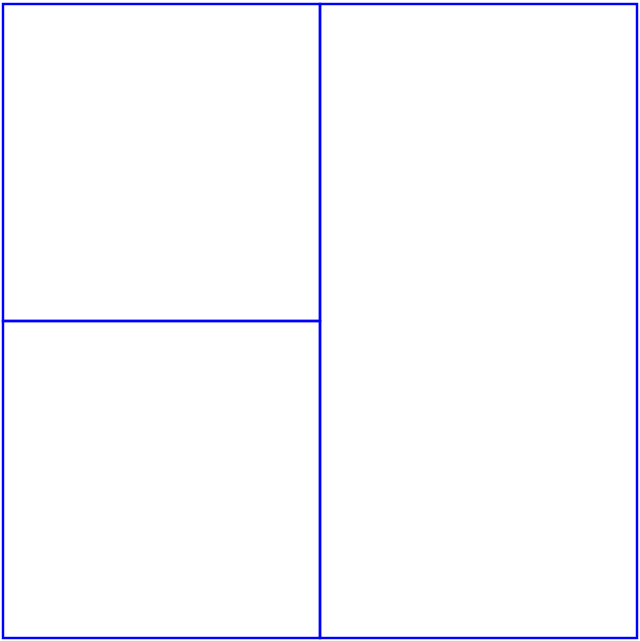

In [49]:
# This is temporary
x_test_pca = pca.fit_transform(x_test_final)    ################################################
# x_test_pca = pca.transform(x_test_final)
print(x_test_pca.shape)
# print(y_test_final.shape)

# Now, classifying using the decision tree,

(3147, 10)


In [50]:
def Accuracy(x_test_pca, midpoint_1, midpoint_2, min_index_1, min_index_2, right_prediction, bottom_prediction, top_prediction):
    correct_right = 0
    total_right = 0
    correct_bottom = 0
    total_bottom = 0
    correct_top = 0
    total_top = 0
    for i in range(len(x_test_pca)):
        if (x_test_pca[i][min_index_1] >= midpoint_1):
            total_right += 1
            if (y_test_final[i] == right_prediction):
                correct_right += 1
        else:
            if (x_test_pca[i][min_index_2] < midpoint_2):
                total_bottom += 1
                if (y_test_final[i] == bottom_prediction):
                    correct_bottom += 1
            elif (x_test_pca[i][min_index_2] >= midpoint_2):
                total_top += 1
                if (y_test_final[i] == top_prediction):
                    correct_top += 1
    print("Correct =", correct_right)
    print("Total =", total_right, "\n")
    print("Correct =", correct_bottom)
    print("Total =", total_bottom, "\n")
    print("Correct =", correct_top)
    print("Total =",total_top, "\n")
    
    print("Total Accuracy = ", 100 * ((correct_right+correct_top+correct_bottom)/(total_right+total_top+total_bottom))) 

Accuracy(x_test_pca, firstBoundaryValue, secondBoundaryValue, firstDimensionIndex, secondDimensionIndex, PRED_RIGHT, PRED_BOTTOM_LEFT, PRED_TOP_LEFT)

Correct = 971
Total = 1444 

Correct = 653
Total = 923 

Correct = 481
Total = 780 

Total Accuracy =  66.88910073085478


In [51]:
import random

# need to change this, make it actually random
# need to also append the Y values while generating a random dataset

def create_bagging_datasets_np(X, Y, n_datasets):
    n_samples = X.shape[1]
    randomX = []
    randomY = []
    for _ in range(n_datasets):
        indices = np.random.choice(n_samples, size=n_samples, replace=True)
        curX = X[:, indices]
        curY = Y[indices]
        randomX.append(curX)
        randomY.append(curY)

    return randomX, randomY

# Usage example
# randomX, randomY = create_bagging_datasets_np(X.T, Y, 5)

randomX, randomY = create_bagging_datasets_np(X.T, Y, 5)
randomX = np.array(randomX)
randomY = np.array(randomY)
# print(randomX)
print(randomX.shape)
# print(randomY)
# print(randomY.shape)

(5, 18623, 784)


In [52]:
import numpy as np

def create_bagging_datasets_np(X, Y, n_datasets):
    """
    Creates n_datasets bagged versions of the input NumPy array data.

    Parameters:
    - X (np.array): The original dataset features in the form of a NumPy array with shape (samples, features).
    - Y (np.array): The original dataset labels in the form of a NumPy array.
    - n_datasets (int): Number of datasets to create.

    Returns:
    - Tuple: A tuple containing two lists, each list containing n_datasets of bagged datasets.
    """
    # n_samples = X.shape[0]
    n_samples = 1000
    randomX = []
    randomY = []
    randomIndices = []
    for _ in range(5):
        indices = np.random.choice(n_samples, size=n_samples, replace=True)
        curX = X[indices]
        curY = Y[indices]
        randomX.append(curX)
        randomY.append(curY)
        randomIndices.append(indices)

    return randomX, randomY, randomIndices

randomX, randomY, randomIndices = create_bagging_datasets_np(X.T, Y, 5)

print(randomX[0].shape)
print(randomY[0].shape)
print(randomIndices)
print(randomIndices[0].shape)
randomX = np.array(randomX)
randomY = np.array(randomY)
# print(X.T.shape)
# print(randomX)
# print(randomX.shape)
print(randomX.shape)
# print(randomY)
# print(randomY.shape)
# print(randomY[2])

(1000, 784)
(1000,)
[array([317, 632, 271, 678, 902,  80, 240, 679, 820, 815,  18, 149, 548,
       970, 953, 360, 383, 693, 532, 984,  12, 916, 254, 502, 767, 743,
       978, 674, 665, 532,  77, 819, 218, 642, 868, 868,  62, 866, 964,
        50, 524, 471, 127,  12, 512,  88, 735,  84, 546, 482,  35, 696,
       645, 670, 715, 822, 293, 499, 797, 780, 645, 561, 628, 482,   8,
        85,   8, 981, 971,  55, 395, 305, 351, 298, 138, 231, 382, 718,
         6, 355, 237, 198, 265, 611, 530, 449, 806, 841, 831, 411, 847,
       642, 211, 660, 645, 450, 125, 430, 346, 961, 759, 187, 571, 815,
       523, 728, 744, 505, 624, 565, 539, 481, 378, 938,  84, 804, 665,
       970, 346, 325, 472, 861, 117, 546, 280, 283, 963, 643, 445,   1,
       881, 144,   7, 780, 751, 882, 743, 692, 803, 962, 725, 631, 233,
       100, 638, 990, 637, 457, 994, 803, 596, 141, 561, 956, 151, 330,
       926, 435, 495, 885, 658, 676, 432, 619, 270, 128, 940, 405, 296,
       229, 493, 493, 657, 895,  24, 337, 9

In [53]:
pca.fit(X.T)
randomXtransformed = [pca.transform(bagged_X) for bagged_X in randomX]
# print(randomXtransformed[0].shape)


In [54]:
def TrainingBagging(randomDatasets, randomY, indexesOriginal):
    baggingPredictions = []
    baggingDimensions = []
    baggingBoundaries = []
    for i in range(len(randomDatasets)):
        # print("DIMENSIONS = ", randomDatasets[i].shape)
        firstDimensionIndex, firstBoundaryValue, X_LEFT, leftIndexes, X_RIGHT, rightIndexes = MidpointSplit(randomDatasets[i], randomY[i], 1000, indexesOriginal[i])
        PRED_RIGHT = predict(randomY[i], rightIndexes)
        secondDimensionIndex, secondBoundaryValue, X_BOTTOM_LEFT, bottomLeftIndexes, X_TOP_LEFT, topLeftIndexes = MidpointSplit(X_LEFT, randomY[i], len(X_LEFT), leftIndexes)
        PRED_BOTTOM_LEFT = predict(randomY[i], bottomLeftIndexes)
        PRED_TOP_LEFT = predict(randomY[i], topLeftIndexes)
        baggingPredictions.append([PRED_RIGHT, PRED_BOTTOM_LEFT, PRED_TOP_LEFT])
        baggingDimensions.append([firstDimensionIndex, secondDimensionIndex])
        baggingBoundaries.append([firstBoundaryValue, secondBoundaryValue])
    print("Predictions =", baggingPredictions)
    print("Dimensions =", baggingDimensions)
    print("Boundaries =", baggingBoundaries)
    return baggingPredictions, baggingDimensions, baggingBoundaries

baggingPredictions, baggingDimensions, baggingBoundaries = TrainingBagging(randomXtransformed, randomY, randomIndices)

0 351 160
321 1 167
253 249 32
68 103 295
177 203 128
144 149 199
191 181 89
130 171 238
150 149 209
171 203 118
186 172 175
135 180 152
160 205 163
161 147 164
162 149 186
159 203 141
160 188 170
161 164 157
162 186 146
159 166 181
0 count =  160 
1 count =  171 
2 count =  158
108 107 106
56 72 62
85 88 87
79 91 81
98 99 105
66 80 63
77 69 78
87 110 90
74 91 79
90 88 89
84 99 96
80 80 72
100 98 83
64 81 85
84 93 75
80 86 93
99 95 84
65 84 84
72 97 94
92 82 74
0 count =  80 
1 count =  100 
2 count =  83
0 count =  80 
1 count =  82 
2 count =  86
5 358 164
318 0 155
264 239 30
59 119 289
180 230 123
143 128 196
186 201 77
137 157 242
162 149 220
161 209 99
175 177 167
148 181 152
177 193 151
146 165 168
186 158 173
137 200 146
154 202 172
169 156 147
174 184 129
149 174 190
0 count =  131 
1 count =  172 
2 count =  170
107 118 116
64 56 66
83 90 90
88 84 92
112 121 94
59 53 88
77 90 77
94 84 105
90 81 94
81 93 88
96 84 102
75 90 80
87 93 101
84 81 81
78 96 92
93 78 90
95 102 93
76 7

In [55]:
def BaggingAccuracy(x_test_pca, baggingBoundaries, baggingDimensions, baggingPredictions):
    combinedFinalPredictions = []
    for i in range(3147):
        current_0 = 0
        current_1 = 0
        current_2 = 0
        for j in range(len(baggingBoundaries)):
            if (x_test_pca[i][baggingDimensions[j][0]] >= baggingBoundaries[j][0]):    # Right
                if (baggingPredictions[j][0] == 0):
                    current_0 += 1
                elif (baggingPredictions[j][0] == 1):
                    current_1 += 1
                elif (baggingPredictions[j][0] == 2):
                    current_2 += 1
            else:                                                                      # Left
                if (x_test_pca[i][baggingDimensions[j][1]] < baggingBoundaries[j][1]): # Bottom
                    if (baggingPredictions[j][1] == 0):
                        current_0 += 1
                    elif (baggingPredictions[j][1] == 1):
                        current_1 += 1
                    elif (baggingPredictions[j][1] == 2):
                        current_2 += 1
                else:                                                                  # Top             
                    if (baggingPredictions[j][2] == 0):
                        current_0 += 1
                    elif (baggingPredictions[j][2] == 1):
                        current_1 += 1
                    elif (baggingPredictions[j][2] == 2):
                        current_2 += 1
        print("current_0 =", current_0, " current_1 =", current_1, " current_2 =", current_2)
        if ((current_2>current_1) and (current_2>current_0)):
            combinedFinalPredictions.append(2)
        elif ((current_1>current_0) and (current_1>current_2)):
            combinedFinalPredictions.append(1)
        else:
            combinedFinalPredictions.append(0)

    return combinedFinalPredictions

combinedFinalPredictions = BaggingAccuracy(x_test_pca, baggingBoundaries, baggingDimensions, baggingPredictions)
print(len(combinedFinalPredictions))
print(combinedFinalPredictions)



current_0 = 0  current_1 = 3  current_2 = 2
current_0 = 0  current_1 = 3  current_2 = 2
current_0 = 1  current_1 = 3  current_2 = 1
current_0 = 0  current_1 = 3  current_2 = 2
current_0 = 1  current_1 = 3  current_2 = 1
current_0 = 1  current_1 = 3  current_2 = 1
current_0 = 0  current_1 = 3  current_2 = 2
current_0 = 1  current_1 = 3  current_2 = 1
current_0 = 1  current_1 = 3  current_2 = 1
current_0 = 0  current_1 = 4  current_2 = 1
current_0 = 0  current_1 = 4  current_2 = 1
current_0 = 1  current_1 = 3  current_2 = 1
current_0 = 0  current_1 = 4  current_2 = 1
current_0 = 0  current_1 = 4  current_2 = 1
current_0 = 0  current_1 = 3  current_2 = 2
current_0 = 0  current_1 = 4  current_2 = 1
current_0 = 0  current_1 = 3  current_2 = 2
current_0 = 0  current_1 = 4  current_2 = 1
current_0 = 0  current_1 = 4  current_2 = 1
current_0 = 1  current_1 = 3  current_2 = 1
current_0 = 0  current_1 = 3  current_2 = 2
current_0 = 1  current_1 = 3  current_2 = 1
current_0 = 1  current_1 = 3  cu

In [56]:
print(combinedFinalPredictions)
print(y_test_final)
print(len(combinedFinalPredictions), len(y_test_final))

correctPrediction = 0
for i in range(len(y_test_final)):
    if (combinedFinalPredictions[i] == y_test_final[i]):
        correctPrediction += 1

print((correctPrediction/len(y_test_final)) * 100)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 